In [15]:
import settings
import settings_update
from helpers import misc_helpers

RUN_SIZE = 'full'

print('loading train/test data')
settings.RUN_SIZE = RUN_SIZE
settings_update.update_run_size_setup()
X_train, y_train, X_val, y_val, X_test, y_test, X, y, scaler_y = misc_helpers.get_data(
    filepath=settings.DATA_FILEPATH,
    train_years=settings.TRAIN_YEARS,
    val_years=settings.VAL_YEARS,
    test_years=settings.TEST_YEARS,
    n_points_per_group=settings.N_POINTS_PER_GROUP,
    do_standardize_data=True,
)
n_test_samples = y_test.shape[0]

y_train, y_val, y_test, y = map(scaler_y.inverse_transform, [y_train, y_val, y_test, y])
y_train, y_val, y_test, y = misc_helpers.make_arrs_1d(y_train, y_val, y_test, y)
print('done')

loading train/test data


C:\Users\Mischa\Desktop\Uni\Master\MA\code\my_code\helpers\misc_helpers.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arr.drop(columns=ts_cols, inplace=True)  # todo: works bc no ts cols present?
C:\Users\Mischa\Desktop\Uni\Master\MA\code\my_code\helpers\misc_helpers.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arr.drop(columns=ts_cols, inplace=True)  # todo: works bc no ts cols present?
C:\Users\Mischa\Desktop\Uni\Master\MA\code\my_code\helpers\misc_helpers.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://

done


In [21]:
from helpers.io_helper import IO_Helper
from helpers.arr_helpers import get_method_to_arrs_gen


ARRAYS_FOLDER = 'arrays'
MODELS_FOLDER = 'models'

METHODS_WHITELIST = set([
    # 'hgbr',
    # 'linreg',
    # 'nn',
    'qhgbr',
    'qr',
    'gp',
    'mvnn',
    'cp_hgbr',
    'cp_linreg',
    'cp_nn',
    'la_nn',
])
UQ_METHOD_TO_ARR_NAMES_DICT = {
    'hgbr': ['base_model_hgbr_n210432_it30_its3.npy'],
    'linreg': ['base_model_linreg_n210432.npy'],
    'nn': ['base_model_nn_n210432_it400_nh2_hs50.npy'],
    'qhgbr': ['native_qhgbr_y_pred_n210432_it0.npy'],
    'qr': ['native_quantile_regression_nn_y_pred_n210432_it300_nh2_hs50.npy'],
    'gp': ['native_gpytorch_y_pred_n210432_it200_new.npy'],
    'mvnn': ['native_mvnn_y_pred_n210432_it100_nh2_hs50.npy'],
    'cp_hgbr': ['posthoc_conformal_prediction_base_model_hgbr_y_pred_n210432_it5.npy'],
    'cp_linreg': ['posthoc_conformal_prediction_base_model_linreg_y_pred_n210432_it5.npy'],
    'cp_nn': ['posthoc_conformal_prediction_base_model_nn_y_pred_n210432_it5_cp2.npy'],
    'la_nn': ['posthoc_laplace_approximation_base_model_nn_y_pred_n210432_it1000_la2.npy'],
}


print('loading predictions')
io_helper = IO_Helper(arrays_folder=ARRAYS_FOLDER, models_folder=MODELS_FOLDER)

uq_method_to_arrs_gen = get_method_to_arrs_gen(
    methods_whitelist=METHODS_WHITELIST,
    method_to_arr_names_dict=UQ_METHOD_TO_ARR_NAMES_DICT,
    io_helper=io_helper,
)
uq_method_to_arrs_dict = dict(uq_method_to_arrs_gen)
print('done')

loading predictions
done


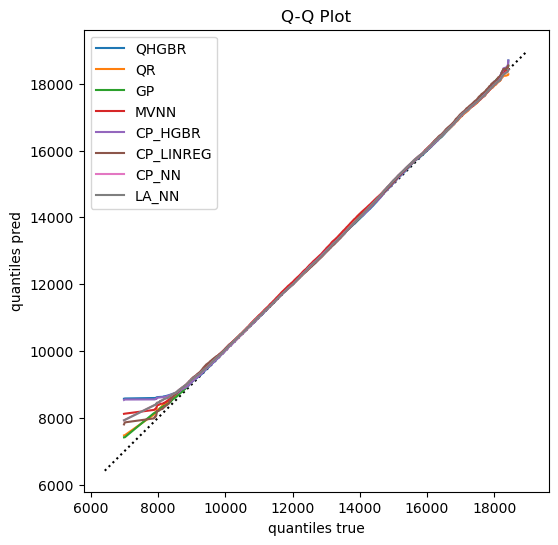

In [23]:
import matplotlib.pyplot as plt
import numpy as np

FILEPATH = 'comparison_storage/plots/qq_plot.png'
ref_line_extra_len = 0.05

qs_true_test = sorted(y_test)

x_min, x_max = qs_true_test[0], qs_true_test[-1]
shift = ref_line_extra_len * (x_max - x_min)
x = np.arange(x_min - shift, x_max + shift)

fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(x, x, linestyle='dotted', color='black')

for method, arrs in uq_method_to_arrs_dict.items():
    # print(f'plotting QQ for {method}')
    y_pred = arrs[0]
    y_pred_test = y_pred[-n_test_samples:]
    qs_pred_test = sorted(y_pred_test)
    ax.plot(qs_true_test, qs_pred_test, label=method.upper())
    # break

ax.set_title('Q-Q Plot')
ax.set_xlabel('quantiles true')
ax.set_ylabel('quantiles pred')
ax.legend()
plt.savefig(FILEPATH)
plt.show()